In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.lines import Line2D
from skopt import Optimizer
from skopt.utils import create_result
import pandas as pd
import seaborn as sns

In [2]:
from problem import styblinski

In [3]:
# Select the problem
func = styblinski

# Store the results for all runs
all_results = []

# Number of runs
num_runs = 5

# Number of evaluations
n_iter = 100

# Perform the optimization
for i in range(num_runs):
    # Initialize optimizer
    opt = Optimizer(func.bounds, base_estimator="GP", acq_func="EI", acq_optimizer="lbfgs", random_state=i)

    # Optimization loop
    for i in range(100):
        suggested = opt.ask()
        y = styblinski([suggested])
        opt.tell(suggested, y)
    
    # Create result object
    x_iters = opt.Xi
    func_vals = opt.yi
    x = opt.Xi[np.argmin(opt.yi)]
    fun = np.min(opt.yi)
    specs = {'args': {'function': 'styblinski', 'bounds': func.bounds, 'base_estimator': 'GP', 'n_calls': n_iter, 'random_state': None}}
    result = create_result(x_iters, func_vals, space=opt.space, rng=opt.rng, specs=specs, models=opt.models)

    all_results.append(result)

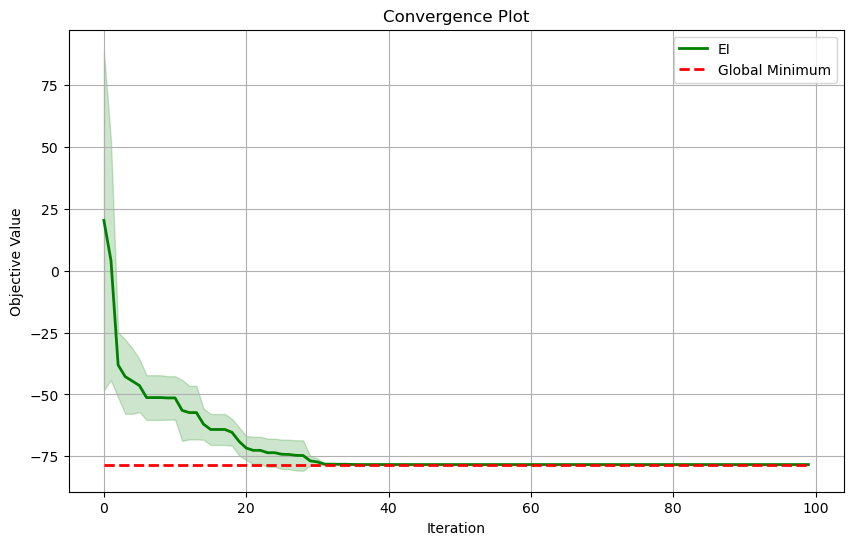

In [4]:
# Compute the average and standard deviation of minimum function value at each step
avg_min_vals = np.mean([np.minimum.accumulate(res.func_vals) for res in all_results], axis=0)
std_min_vals = np.std([np.minimum.accumulate(res.func_vals) for res in all_results], axis=0)

# Generate the convergence plot
plt.figure(figsize=(10, 6))

plt.plot(avg_min_vals, 'g-', linewidth=2.0, label='EI')
plt.fill_between(range(n_iter), avg_min_vals-std_min_vals, avg_min_vals+std_min_vals, color='g', alpha=0.2)

# Global minimum for Styblinski function
global_minimum = -39.16599 * 2
plt.plot([global_minimum]*n_iter, 'r--', linewidth=2.0, label='Global Minimum')

plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Convergence Plot')
plt.legend()
plt.grid()
plt.show()

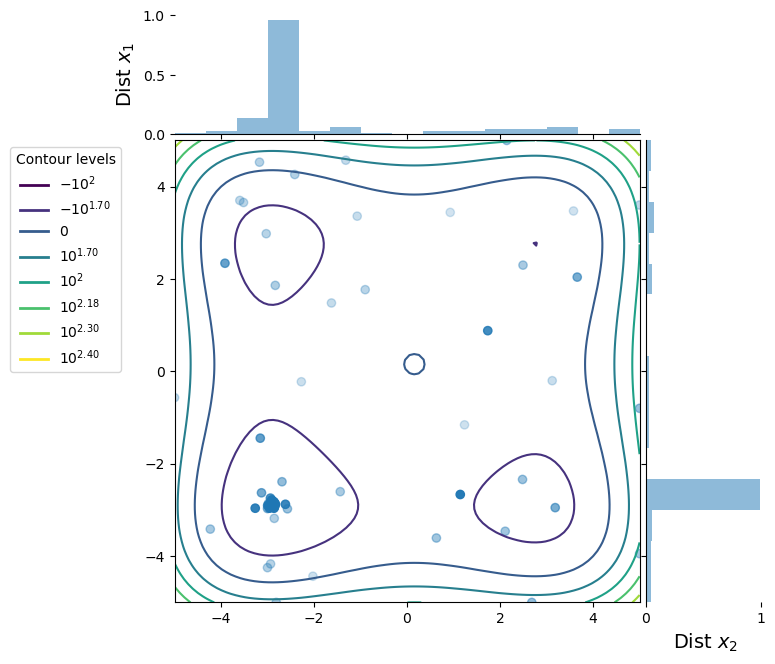

In [6]:
# put x_iters in two columns pandas dataframe
x_iters = np.array(all_results[0].x_iters)
x_iters_df = pd.DataFrame(x_iters, columns=['x', 'y'])

# Create main 2D scatter plot
f, ax = plt.subplots(figsize=(6, 6))

# Create an alpha array between 0.2 and 1 based on the order of points
# This creates a gradient of points from light to dark (first to last)
n = len(x_iters_df["x"])
start = 0.2
stop = 1
alpha_array = np.linspace(start, stop, n)

ax.scatter(x_iters_df["x"], x_iters_df["y"], alpha=alpha_array)


# plot contour
xl, xu = func.bounds[0]
yl, yu = func.bounds[1]

x = np.linspace(xl, xu, 100)
y = np.linspace(yl, yu, 100)

x_ax, y_ax = np.meshgrid(x, y)

vals = np.c_[x_ax.ravel(), y_ax.ravel()]
z_ax = np.reshape([styblinski(val) for val in vals], (100, 100))

# Generate contour plot
contour_set = ax.contour(x_ax, y_ax, z_ax)

# Create legend manually
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
contour_labels = [fmt(x) for x in contour_set.levels]

# Creating a list of Line2D objects to set in the legend
lines = [Line2D([0], [0], color=line.get_edgecolor(), linewidth=2)
        for line in contour_set.collections]

# Adding legend manually
ax.legend(lines, contour_labels, title="Contour levels",
          bbox_to_anchor=(-0.1, 1), loc='upper right')

# Create a new axes for the x marginal histogram with the same x axis
ax_x_hist = f.add_axes([ax.get_position().x0,
                        ax.get_position().y0 + ax.get_position().height + 0.01,
                        ax.get_position().width, 0.2], sharex=ax)
ax_x_hist.hist(x_iters_df["x"], bins=15, density=True, alpha=0.5)
ax_x_hist.get_yaxis().set_tick_params(which='both', direction='out')
sns.despine(ax=ax_x_hist, left=True)  # Remove left spine
ax_x_hist.set_ylabel(r"Dist $x_1$", fontsize = 14)  # Set the label for the x marginal histogram

# Create a new axes for the y marginal histogram with the same y axis
ax_y_hist = f.add_axes([ax.get_position().x0 + ax.get_position().width + 0.01,
                        ax.get_position().y0, 0.2,
                        ax.get_position().height], sharey=ax)
ax_y_hist.hist(x_iters_df["y"], bins=15, density=True, orientation='horizontal', alpha=0.5)
ax_y_hist.get_xaxis().set_tick_params(which='both', direction='out')
sns.despine(ax=ax_y_hist, bottom=True)  # Remove bottom spine
ax_y_hist.set_xlabel(r"Dist $x_2$", fontsize = 14)  # Set the label for the y marginal histogram

# Hide redundant tick labels
plt.setp(ax_x_hist.get_xticklabels(), visible=False)
plt.setp(ax_y_hist.get_yticklabels(), visible=False)

plt.show()

In [7]:
all_results[0].x_iters

[[0.9284461822501839, 3.442657485810175],
 [3.57945617622757, 3.472517387841256],
 [1.2356369678597243, -1.1561829270730009],
 [-2.0246539345552765, -4.432870226825568],
 [-2.2734370541988675, -0.22334882678650025],
 [3.121687287754934, -0.20022827624942607],
 [-1.0721520389917014, 3.360787635373777],
 [-1.6260383958273157, 1.4817187205119726],
 [-1.3175846015945196, 4.571551589530467],
 [-3.596492195873548, 3.700872583584365],
 [-5.0, -0.5666218095804352],
 [5.0, 3.6019556751692896],
 [-3.5168553622059004, 3.6564944118571905],
 [-0.9001352655590766, 1.7699126097208984],
 [-3.0286423333527344, 2.981400853811871],
 [-2.935467530082407, -4.1664301499796474],
 [-3.173177812315229, 4.529018330959847],
 [-2.4149703420761846, 4.262324985568743],
 [-3.001616768300904, -4.247173856029288],
 [-2.8554923604470526, -3.180514925673289],
 [-2.833742742020164, 1.8622741761572286],
 [-2.812855885718692, -5.0],
 [-1.4372168111108379, -2.602567111794323],
 [2.4934877658565284, 2.3006968262742733],
 [-4